## Objetivo y alcance

En esta segunda aproximación (que suele ir de la mano con el análisis exploratorio y visualización) se pretende empezar a transformar el dataset para los primeros experimentos de aprendedores en las siguientes materias. 

En este laboratorio el primer gran objetivo va a ser lograr un único dataset con columnas nuevas, que condense toda la información importante para el posterior entrenamiento y aprendizaje que permitirá conocer si algunas de las variables incluidas en el mismo tienen influencia sobre las fallas en el chatbot y la experiencia que los usuarios tienen con el mismo.
 
Se deberá explorar la base de datos y detectar variables erroneas, o información repetida, para guardarlo en un archivo nuevo luego de haber obtenido el dataset deseado. 

[El dataset nuevo se puede encontrar acá](https://drive.google.com/drive/folders/1MfY_PqF4j-qBnT2hvazEvJ55B8vzMlfw?usp=sharing)


## Lista de tareas 

0) El dataset ha cambiado de estructura y tamaño! Ahora hay +488698 registros, y ya no existe From_anon y To_anon. En vez de eso hay un conversation id (conv_id), con el cual se puede seguir una conversación teniendo en cuenta que tenemos el dato del SentDate. Familiarizarse con esta estructura corriendo nuevamente los análisis implementados en el práctico anterior de cantidad de mensajes por conversación!

1) Verificar los tipos de datos detectados por pandas. Asegurar tipo de datos correctos para las variables que son continuas y aquellas que son categóricas. En el caso de no coincidir se deberán modificar la naturaleza de esas variables.

2) Verificar y asegurar que no existan datos duplicados.

3) Verificar que no existan caracteres "raros" para los datos de los features "Body". Tip: Pueden hacerlo importando la librería ftfy.badness

4) A partir de la columna "Body" y las clases que encontraron en el práctico anterior, generar columnas que codifiquen esas categorías para su posterior uso en los próximos prácticos. Tienen que generar al menos cuatro columnas nuevas. Justifiquen la elección de esa generación respecto a posibles problemas para los cuales puedan ser útiles.

5) Verificar espacios y normalizar los nombres de las features que crean convenientes para un mejor entendimiento de su significado. 

6) Supongamos que necesitamos compartir públicamente todo el dataset y que los features "Body" contienen potencialmente datos sensibles y confidenciales. Elijan y apliquen técnicas de análisis de texto para detectarlas y técnicas de despersonalización para solucionar este aspecto.

7) Analizar y normalizar los datos faltantes (nulos), si existen.

8) Outliers: existen valores atípicos en las columnas del dataset? Si las hay, aplicar una solución para normalizar solo esos Outliers. 

9) Guardar el dataset resultante con un nuevo nombre, para trabajarlo más adelante.

# Se evaluarán los siguientes aspectos:
  
1- Que se apliquen los conceptos vistos con los profes en el teórico y en el práctico.

2- Que el entregable no sea solo la notebook. El informe debe tener un mensaje claro y debe presentarse en un formato legible para cualquier tipo de stakeholder. Además, se deberá entregar el dataset trabajado.

3- Capacidad de Análisis y justificación. Proactividad en la profundización de los análisis.

4- Criterio para elegir que solución aplicar en cada caso y con qué método implementarla.

5- Calidad y estilo de código.


Deadline tentativo para la entrega 21/06/2022

### 0) El dataset ha cambiado de estructura y tamaño! Ahora hay +488698 registros, y ya no existe From_anon y To_anon. En vez de eso hay un conversation id (conv_id), con el cual se puede seguir una conversación teniendo en cuenta que tenemos el dato del SentDate. Familiarizarse con esta estructura corriendo nuevamente los análisis implementados en el práctico anterior de cantidad de mensajes por conversación!

In [3]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib
import matplotlib.pyplot as plt
file_key_marzo = 'marzo_anon_test.csv'
file_key_febrero = 'febrero_anon_test.csv'

df_marzo = pd.read_csv(file_key_marzo)
df_febrero = pd.read_csv(file_key_febrero)


In [4]:
#Se concatenan los dataframes.

df_original = pd.concat([df_marzo,df_febrero])

df = df_original.copy()

#Remuevo la primera columna porque no es de utilidad.

df_definitiva = df.drop(['Unnamed: 0'], axis=1)

df_definitiva.head()

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,Falla_Api_Externo,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id
0,Carra,whatsapp:+5493515266217,"Hola, soy el asistente virtual de Clinica Carr...",read,2022-02-16 20:52:07+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
1,Carra,whatsapp:+5493515266217,tu turno de CLINICA MEDICA ha sido confirmado...,read,2022-02-16 20:52:06+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
2,Carra,whatsapp:+5493515266217,Si,received,2022-02-16 20:52:04+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
3,Carra,whatsapp:+5493515266217,¡Muchas gracias! Tus datos son: \n Sede: Carr...,read,2022-02-16 20:51:59+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
4,Carra,whatsapp:+5493515266217,2,received,2022-02-16 20:51:58+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0


In [5]:
#Se tiene un dataframe con  488698 filas y 40 columnas.

df_definitiva.shape

(394090, 40)

### 1) Verificar los tipos de datos detectados por pandas. Asegurar tipo de datos correctos para las variables que son continuas y aquellas que son categóricas. En el caso de no coincidir se deberán modificar la naturaleza de esas variables.

In [6]:
#Se visualizan todas las columnas y el tipo de dato de cada una de ellas.

df_definitiva.dtypes

Hospital                   object
Tel_hospital               object
Body                       object
Status                     object
SentDate                   object
Fecha                      object
Dia                         int64
Mes                         int64
Hora                        int64
Messages                    int64
Direction                  object
Appointment_msp            object
Appointment                 int64
Cancellation_msp           object
Cancelled                   int64
consult                    object
Consult_Appoint             int64
fail_HH_sms                object
Fail_HH                     int64
achieve_HH                 object
Got_HH                      int64
Cupo                       object
Full_turnos_obra_social     int64
No_Relation                object
No_Correlation              int64
has_error                  object
Error_Interno               int64
has_error_501              object
Error_501                   int64
falla_api_exte

In [7]:
cols = ['has_error_501', 'has_error', 'issue_name', 
        'ask_kunan', 'many_fallbacks_goto_hh',
        'Cupo', 'consult',
        'Appointment_msp', 'Direction', 
        'No_Relation']

for col in cols:
    vs = df_definitiva[col]
    print(f"{col}: {set(vs)}")

has_error_501: {"['el sistema de gestión de turnos no está disponible']", '[]'}
has_error: {"['error interno. cerrá y volvé a abrir la aplicación']", '[]'}
issue_name: {"['para poder agendar tu turno necesito tu nombre y apellido']", '[]'}
ask_kunan: {"['kunan es la empresa de tecnología responsable por el desarrollo de este asistente virtual']", '[]'}
many_fallbacks_goto_hh: {"['disculpe, el asistente virtual de']", '[]'}
Cupo: {"['cupo de consultas diarias con la obra social seleccionada']", '[]'}
consult: {"['estoy buscando tus turnos']", '[]'}
Appointment_msp: {"[' ha sido confirmado']", '[]'}
Direction: {'outbound-api', 'inbound'}
No_Relation: {"['solamente ayudo con temas relacionados con nuestro centro de salud']", '[]'}


In [8]:
#Se convierten las columnas SentDate y Fecha al tipo de datos datetime.
df_definitiva['SentDate'] = pd.to_datetime(df_definitiva.SentDate)
df_definitiva['Fecha'] = pd.to_datetime(df_definitiva.Fecha)

df_definitiva[['SentDate', 'Fecha']].sample(5)

,SentDate,Fecha
35755,2022-02-05 16:54:13+00:00,2022-02-05
77832,2022-02-11 13:10:42+00:00,2022-02-11
165529,2022-02-23 19:34:34+00:00,2022-02-23
69975,2022-02-10 13:58:22+00:00,2022-02-10
85225,2022-02-14 16:12:23+00:00,2022-02-14


In [9]:
#Se visulizan nuevamentes las columnas con los tipos de datos cambiados.

df_definitiva.dtypes

Hospital                                object
Tel_hospital                            object
Body                                    object
Status                                  object
SentDate                   datetime64[ns, UTC]
Fecha                           datetime64[ns]
Dia                                      int64
Mes                                      int64
Hora                                     int64
Messages                                 int64
Direction                               object
Appointment_msp                         object
Appointment                              int64
Cancellation_msp                        object
Cancelled                                int64
consult                                 object
Consult_Appoint                          int64
fail_HH_sms                             object
Fail_HH                                  int64
achieve_HH                              object
Got_HH                                   int64
Cupo         

In [10]:
#Se encuentra la cantidad de valores faltantes.
#Como se puede observar no hay ningun valor faltante.

df_definitiva.isnull().sum()

Hospital                   0
Tel_hospital               0
Body                       0
Status                     0
SentDate                   0
Fecha                      0
Dia                        0
Mes                        0
Hora                       0
Messages                   0
Direction                  0
Appointment_msp            0
Appointment                0
Cancellation_msp           0
Cancelled                  0
consult                    0
Consult_Appoint            0
fail_HH_sms                0
Fail_HH                    0
achieve_HH                 0
Got_HH                     0
Cupo                       0
Full_turnos_obra_social    0
No_Relation                0
No_Correlation             0
has_error                  0
Error_Interno              0
has_error_501              0
Error_501                  0
falla_api_externo          0
Falla_Api_Externo          0
alta_dni                   0
not_DNI                    0
issue_name                 0
Issue_Name    

In [11]:
#Numero de valores unicos de conv_id, esto se traduce en cantidad de conversaciones presentes en el dataframe.

df_definitiva['conv_id'].nunique()

5307

In [12]:
#Cantidad de mensajes promedio por conversacion

Cant_Mensajes = 488698 / df_definitiva['conv_id'].nunique()
round(Cant_Mensajes)

92

In [13]:
#Se ordenan los datos en base a la fecha de envío de los mensajes para mejor visualización de los datos.

df.sort_values(by='SentDate',ascending=True)

,Unnamed: 0,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,...,Falla_Api_Externo,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id
94068,94068,Carra,whatsapp:+5493515266217,Consultar mis turnos,received,2022-01-31 21:18:18+00:00,2022-01-31,31,1,21,...,0,[],0,[],0,[],0,[],0,2859
94068,94068,Carra,whatsapp:+5493515266217,Consultar mis turnos,received,2022-01-31 21:18:18+00:00,2022-01-31,31,1,21,...,0,[],0,[],0,[],0,[],0,2859
94066,94066,Carra,whatsapp:+5493515266217,"Necesito tu DNI, por favor.",read,2022-01-31 21:18:19+00:00,2022-01-31,31,1,21,...,0,[],0,[],0,[],0,[],0,2859
94067,94067,Carra,whatsapp:+5493515266217,Tu sesión se ha reinciado por tiempo de inacti...,read,2022-01-31 21:18:19+00:00,2022-01-31,31,1,21,...,0,[],0,[],0,[],0,[],0,2859
94067,94067,Carra,whatsapp:+5493515266217,Tu sesión se ha reinciado por tiempo de inacti...,read,2022-01-31 21:18:19+00:00,2022-01-31,31,1,21,...,0,[],0,[],0,[],0,[],0,2859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193575,193575,Carra,whatsapp:+5493515266217,XXXXXXXX,received,2022-02-28 20:43:25+00:00,2022-02-28,28,2,20,...,0,[],0,[],0,[],0,[],0,1587
193574,193574,Carra,whatsapp:+5493515266217,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,read,2022-02-28 20:43:30+00:00,2022-02-28,28,2,20,...,0,['no se encuentra registrado ese dni en el sis...,1,[],0,[],0,[],0,1587
193574,193574,Carra,whatsapp:+5493515266217,XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX,read,2022-02-28 20:43:30+00:00,2022-02-28,28,2,20,...,0,['no se encuentra registrado ese dni en el sis...,1,[],0,[],0,[],0,1587
193573,193573,Carra,whatsapp:+5493515266217,¿Te puedo ayudar con algo más?,read,2022-02-28 20:43:30+00:00,2022-02-28,28,2,20,...,0,[],0,[],0,[],0,[],0,1587


### 2) Verificar y asegurar que no existan datos duplicados.

¿Qué  implica que una columna esté duplicada?
Podemos pensar una consulta duplicada de dos maneras:
* El mismo evento ocurra dos veces: Por ejemplo, un determinado paciente consulte los turnos dos veces seguidas. Si bien es poco probable que un usuario genere dos eventos iguales (la columna `SentDate` tiene granularidad de segundos), la plataforma de mensajería podría enviar el mismo evento mas de una vez en el mismo segundo. Dado el conjunto de columnas del que disponemos, estos eventos no se podrian distinguir entre si.

* La plataforma de turnos almacena o genera eventos multiples veces.

¿Qué columnas sirven para identificar un evento como único ?
Debemos establecer un subconjunto de columnas que nos permitan identificar duplicados. Para ello vamos a definir la lista `event_markers`

In [14]:
event_markers = set(['Hospital', 'Body', 'conv_id', 'Direction' ,'SentDate'])

In [15]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

duplicated_events = df_definitiva[df_definitiva.duplicated(subset = event_markers, keep = 'first') == True]

len(duplicated_events)

197178

In [16]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html

duplicated_events = df_definitiva[df_definitiva.duplicated(subset = event_markers, keep = 'first') == False]

len(duplicated_events)

196912

Se puede investigar el origen de los mensajes duplicados, por ejemplo 
* ¿A qué hospital pertenecen?
* ¿Qué día o mes se duplicaron mensajes?
* ¿Que dirección tienen los mensajes duplicados?

In [17]:
duplicated_events.groupby(['Hospital'])['Messages'].count()

Hospital
Carra                 51277
CityBell              94500
Desarrollo               15
Los Cedros            25146
Salud Consultorios    25009
Santa Fe                965
Name: Messages, dtype: int64

In [18]:
duplicated_events.groupby(['Mes', 'Dia'])['Messages'].count()

Mes  Dia
1    31       314
2    1       1680
     2       9549
     3       8899
     4       6458
     5       1560
     6        984
     7      12056
     8      11706
     9       9973
     10      8043
     11      6452
     12      1187
     13      1218
     14     12805
     15     12196
     16     10640
     17      9932
     18      7766
     19      1648
     20      1126
     21     17493
     22     11643
     23     11355
     24     10104
     25      6733
     26      1668
     27       669
     28      1055
Name: Messages, dtype: int64

In [19]:
duplicated_events.groupby(['Direction'])['Messages'].count()

Direction
inbound          80975
outbound-api    115937
Name: Messages, dtype: int64

Finalmente, podemos obtener un conjunto de datos sin duplicados

In [20]:
df_unique = df_definitiva.drop_duplicates(subset = event_markers, keep='first')
df_unique

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,Falla_Api_Externo,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id
0,Carra,whatsapp:+5493515266217,"Hola, soy el asistente virtual de Clinica Carr...",read,2022-02-16 20:52:07+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
1,Carra,whatsapp:+5493515266217,tu turno de CLINICA MEDICA ha sido confirmado...,read,2022-02-16 20:52:06+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
2,Carra,whatsapp:+5493515266217,Si,received,2022-02-16 20:52:04+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
3,Carra,whatsapp:+5493515266217,¡Muchas gracias! Tus datos son: \n Sede: Carr...,read,2022-02-16 20:51:59+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
4,Carra,whatsapp:+5493515266217,2,received,2022-02-16 20:51:58+00:00,2022-02-16,16,2,20,1,...,0,[],0,[],0,[],0,[],0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197040,CityBell,whatsapp:+5492215137770,XXXXXXXX,received,2022-02-25 21:17:01+00:00,2022-02-25,25,2,21,1,...,0,[],0,[],0,[],0,[],0,5306
197041,CityBell,whatsapp:+5492215137770,"Necesito tu DNI, por favor.",delivered,2022-02-25 21:16:45+00:00,2022-02-25,25,2,21,1,...,0,[],0,[],0,[],0,[],0,5306
197042,CityBell,whatsapp:+5492215137770,Sacar turno,received,2022-02-25 21:16:44+00:00,2022-02-25,25,2,21,1,...,0,[],0,[],0,[],0,[],0,5306
197043,CityBell,whatsapp:+5492215137770,"Hola, soy el asistente virtual de Centro Medic...",delivered,2022-02-25 21:16:26+00:00,2022-02-25,25,2,21,1,...,0,[],0,[],0,[],0,[],0,5306


### 3) Verificar que no existan caracteres "raros" para los datos de los features "Body". Tip: Pueden hacerlo importando la librería ftfy.badness
Usamos el módulo `ftfy` para procesar el campo `Body`, generando una columna nueva (`fixed_body`) que contenga el texto procesado.

In [21]:
!pip install ftfy
import ftfy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python3.9 -m pip install --upgrade pip



Usamos la función `fit_text` sin ningún tipo de configuración, solo para si efectivamente existen caracteres raros (que a su vez parece ser una definición laxa, ver https://ftfy.readthedocs.io/en/latest/config.html)

In [22]:
text_fixer_config = ftfy.TextFixerConfig(uncurl_quotes=True, fix_character_width=True, fix_line_breaks=True)

Por ejemplo, podemos corregir esta linea de texto sin mucho esfuerzo

In [23]:
ejemplo = "Tu sesiÃ³n se ha reinciado por tiempo de inactividad. Voy a tener que pedirte tus datos nuevamente ðŸ“"

ftfy.fix_text(ejemplo, text_fixer_config)

'Tu sesión se ha reinciado por tiempo de inactividad. Voy a tener que pedirte tus datos nuevamente 📝'

In [24]:
df_unique.falla_api_externo.sample(5)

182476    []
186368    []
50078     []
30307     []
105377    []
Name: falla_api_externo, dtype: object

Para corregir el campo `body` (al que nos limitamos) vamos a usar una función lambda y generar una nueva columna

In [25]:
apply_ftfy_rules = lambda s: ftfy.fix_text(s, text_fixer_config)

In [26]:
df_unique.loc[:,'fixed_body'] = df_unique.Body.apply(apply_ftfy_rules)
df_unique.sample(3)


/var/folders/s6/yjtm_slj60sft1f08wtzs2mw0000gn/T/ipykernel_13315/1140182939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique.loc[:,'fixed_body'] = df_unique.Body.apply(apply_ftfy_rules)


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id,fixed_body
70379,CityBell,whatsapp:+5492215137770,Cambiar un dato,received,2022-02-10 13:21:17+00:00,2022-02-10,10,2,13,1,...,[],0,[],0,[],0,[],0,2207,Cambiar un dato
15060,Carra,whatsapp:+5493515266217,*Escribe el número de la opción* que quieres e...,read,2022-02-02 12:29:54+00:00,2022-02-02,2,2,12,1,...,[],0,[],0,[],0,[],0,555,*Escribe el número de la opción* que quieres e...
95448,Carra,whatsapp:+5493515266217,XXXXXXXXXXXXXX,received,2022-02-07 08:25:35+00:00,2022-02-07,7,2,8,1,...,[],0,[],0,[],0,[],0,2881,XXXXXXXXXXXXXX


¿Qué tipo de cambios se realizaron? Podemos analizar los cambios realizados utilizando un filtro comparando las columnas `Body` y `fixed_body`

In [27]:
fixed_filter = df_unique['fixed_body'] != df_unique['Body']
len(df_unique[fixed_filter])

195

In [28]:
set(df_unique[fixed_filter].Body.values)

{'Está gestión puede realizarla a través del asistente virtual. Debe solicitar “Consultar mis turnos” e indicar su número de DNI para que Merlin le informe sobre sus próximos turnos.',
 'Si ud. tiene la obra social OSCEARA u OSPECOR por favor escriba “Quiero hablar con un operador” para realizar la correcta autorización',
 '“Quiero hablar con un operador “',
 '“Quiero hablar con un operador”',
 '“Quiero hablar con un operado”'}

### 4) A partir de la columna "Body" y las clases que encontraron en el práctico anterior, generar columnas que codifiquen esas categorías para su posterior uso en los próximos prácticos. Tienen que generar al menos cuatro columnas nuevas. Justifiquen la elección de esa generación respecto a posibles problemas para los cuales puedan ser útiles.

## Codificación de clases

En el primer entregable se distinguieron las siguientes clases
* Hospitales presentes en el _dataset_
* Especialidad 
* Acción del usuario
* Días hasta el turno

In [29]:
df = df_unique.copy(deep=True)
df.Body

0         Hola, soy el asistente virtual de Clinica Carr...
1          tu turno de CLINICA MEDICA ha sido confirmado...
2                                                        Si
3         ¡Muchas gracias! Tus datos son: \n  Sede: Carr...
4                                                         2
                                ...                        
197040                                             XXXXXXXX
197041                          Necesito tu DNI, por favor.
197042                                          Sacar turno
197043    Hola, soy el asistente virtual de Centro Medic...
197044                                                 XXXX
Name: Body, Length: 196912, dtype: object

### Hospital
Al igual que en el primer entregable, vemos que los hospitales incluidos en la muestra se limitan a un conjunto acotado y desbalanceado

In [30]:
df.Hospital.value_counts()

CityBell              94500
Carra                 51277
Los Cedros            25146
Salud Consultorios    25009
Santa Fe                965
Desarrollo               15
Name: Hospital, dtype: int64

<AxesSubplot:title={'center':'Mensajes por Hospital'}, xlabel='Hospital', ylabel='Count'>

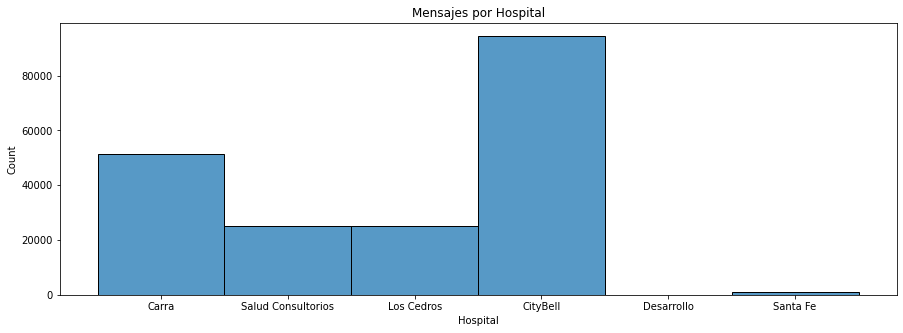

In [31]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Mensajes por Hospital')

seaborn.histplot(data = df.Hospital)

### Dias hasta el turno
¿Cuál es el periodo de tiempo que pasa entre la fecha que un paciente contacta al servicio y el turno otorgado? Podemos calcularlo a partir de los valores de la columna `Body` y `SentDate`. ¿Cuál es el valor de esta columna derivada? Eventualmente se puede utilizar para predecir comportamiento mediante algoritmos de aprendizaje supervisado

In [32]:
f = lambda b: 'tu turno de' in b 
turno_filter = ((df.Body.apply(f)) & (df.Direction == 'outbound-api') & (df.Appointment == 1))

In [33]:
df[turno_filter].Body.sample(2).values

array([' tu turno de CLINICA MEDICA ha sido confirmado para la fecha 06/04/2022 a las 12:50 hrs, en Calle 474 N583 entre 14a y 14b City Bell, con Dr./Dra. Bazterrica Maria Luz',
       ' tu turno de Cardiologia ha sido confirmado para la fecha 21/02/2022 a las 08:00 hrs, en Carrá, Bv. 9 de Julio 1501, S.Francisco, con Dr./Dra. Vogliotti Ignacio'],
      dtype=object)

Creamos una función que nos permita obtener la fecha del turno asignado, a partir del contenido de la columna `Body`

In [34]:
from datetime import datetime

def time_from_appointment(s):
    """
    Return a datetime with the dd/mm/yyyy format for the appointment date
    """
    parts = s.split()
    t = parts.index("fecha") + 1
    return pd.to_datetime(parts[t].strip(), format = '%d/%m/%Y').to_numpy()

In [35]:
teststr = """tu turno de OTORRINOLARINGOLOGIA ha sido confirmado para la fecha 13/06/2022 a las 17:30 hrs, en Cons. Externos, Sede Tomás Villegas 2387, con Dr./Dra. Zicarelli Juan Carlos'"""
test_date = time_from_appointment(teststr)    

In [36]:
print(test_date)

2022-06-13T00:00:00.000000000


Finalmente agregamos la columna `days_to_appointment` con la cantidad de días entre el contacto y el turno

In [37]:
df.loc[turno_filter, 'time_to_appointment'] = df[turno_filter].\
apply(lambda row: time_from_appointment(row.Body) - row.Fecha, axis = 1)


Vemos que la columna `time_to_appointment` contiene una descripción del periodo de tiempo

In [38]:
df[turno_filter]['time_to_appointment'].sample(2)

130275   54 days
44237    28 days
Name: time_to_appointment, dtype: timedelta64[ns]

Procesando la nueva columna podemos obtener la distribución de los días que cada paciente debe esperar a su turno (al menos en un momento inicial, sin considerar aquellos turnos que se cancelan).

* La mitad de los turnos se asignan para los próximos 16 días
* El 75% de los turnos en poco mas de un mes

In [40]:
#days to appointment
dfplot = df[turno_filter][['time_to_appointment', 'Hospital']]
dfplot.loc[:,'days_to_appointment'] = dfplot.apply(lambda row: row['time_to_appointment'].total_seconds() / 86400, axis = 1)
dfplot.describe()

,time_to_appointment,days_to_appointment
count,2557,2557.000000
mean,22 days 19:01:31.513492374,22.792726
std,21 days 20:02:26.413181184,21.835028
min,1 days 00:00:00,1.000000
25%,7 days 00:00:00,7.000000
50%,16 days 00:00:00,16.000000
75%,33 days 00:00:00,33.000000
max,167 days 00:00:00,167.000000


<AxesSubplot:title={'center':'Dias hasta el turno asignado (por Hospital)'}, xlabel='Hospital', ylabel='days_to_appointment'>

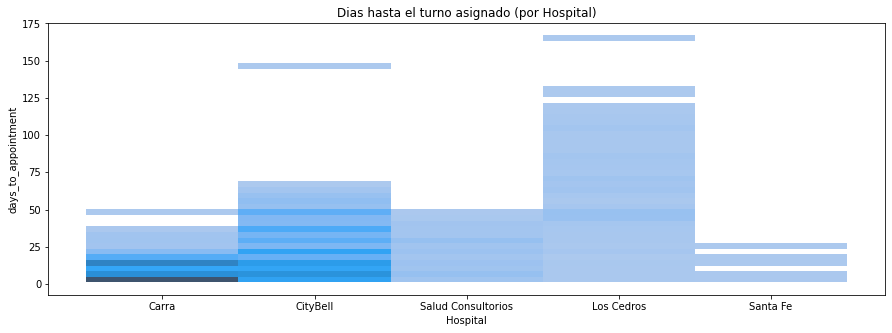

In [41]:
fig = plt.figure(figsize=(15, 5))
plt.ticklabel_format(style='plain', axis='x')
plt.title('Dias hasta el turno asignado (por Hospital)')

seaborn.histplot(x = dfplot.Hospital, y = dfplot.days_to_appointment, palette = "pastel")

### Acción del usuario

Ante el contacto inicial, el _bot_ invita al usuario a realizar una acción que puede ser
* Sacar turno
* Cancelar un turno
* Consultar turnos
* Pedir ayuda

A partir de la respuesta del usuario, podemos agregar una respuesta categorizando su intención

In [42]:
df.loc[197043, 'Body']

'Hola, soy el asistente virtual de Centro Medico de Diagnostico City Bell.  \n   \nPodés preguntarme información sobre Centro Medico de Diagnostico City Bell, o podés realizar alguna de estas acciones:\n ▪️ Sacar turno\n ▪️ Cancelar turno\n ▪️ Consultar mis turnos\n ▪️ Ayuda\n *Escribí la acción* que querés realizar.'

In [43]:
actions = ['sacar turno', 'cancelar turno', 'consultar mis turnos', 'ayuda']

user_action_filter = (df.Body.apply(lambda x: any([k.lower() in x for k in actions]))) & (df.Direction == 'inbound')
df[user_action_filter]

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id,fixed_body,time_to_appointment
64,Salud Consultorios,whatsapp:+5493515266230,sacar turno,received,2022-02-16 19:55:45+00:00,2022-02-16,16,2,19,1,...,0,[],0,[],0,[],0,1,sacar turno,NaT
70,Salud Consultorios,whatsapp:+5493515266230,sacar turno,received,2022-02-16 19:53:01+00:00,2022-02-16,16,2,19,1,...,0,[],0,[],0,[],0,1,sacar turno,NaT
180,CityBell,whatsapp:+5492215137770,"Buenas, queria sacar turno para dos electrocar...",received,2022-02-16 19:20:45+00:00,2022-02-16,16,2,19,1,...,0,[],0,[],0,[],0,10,"Buenas, queria sacar turno para dos electrocar...",NaT
383,CityBell,whatsapp:+5492215137770,sacar turno,received,2022-02-16 18:46:57+00:00,2022-02-16,16,2,18,1,...,0,[],0,[],0,[],0,20,sacar turno,NaT
472,Carra,whatsapp:+5493515266217,Necesito sacar turno,received,2022-02-16 18:34:08+00:00,2022-02-16,16,2,18,1,...,0,[],0,[],0,[],0,24,Necesito sacar turno,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191503,CityBell,whatsapp:+5492215137770,queria sacar turno para ecocardiograma para mi...,received,2022-02-25 10:52:34+00:00,2022-02-25,25,2,10,1,...,0,[],0,[],0,[],0,5191,queria sacar turno para ecocardiograma para mi...,NaT
191763,CityBell,whatsapp:+5492215137770,sacar turno,received,2022-02-25 10:34:19+00:00,2022-02-25,25,2,10,1,...,0,[],0,[],0,[],0,5198,sacar turno,NaT
192519,Carra,whatsapp:+5493515266217,sacar turno,received,2022-02-25 09:19:26+00:00,2022-02-25,25,2,9,1,...,0,[],0,[],0,[],0,5169,sacar turno,NaT
192655,CityBell,whatsapp:+5492215137770,Es q necesito sacar turno para oftalmológica ...,received,2022-02-25 09:12:03+00:00,2022-02-25,25,2,9,1,...,0,[],0,[],0,[],0,5224,Es q necesito sacar turno para oftalmológica ...,NaT


In [44]:
def get_user_action(data):
    utext = data.lower()
    if 'sacar' in utext:
        return 'TURNO'
    elif 'cancelar' in utext:
        return 'CANCELAR'
    elif 'ayuda' in utext:
        return 'AYUDA'
    elif 'consultar' in utext:
        return 'CONSULTA'
    else:
        return "DESCONOCIDA"
        


In [45]:
user_action_col = 'ACCION_USUARIO'
df.loc[user_action_filter, user_action_col] = df[user_action_filter].Body.apply(get_user_action)
df[user_action_col].value_counts()

TURNO       515
CANCELAR     40
AYUDA        36
CONSULTA     25
Name: ACCION_USUARIO, dtype: int64

Podemos ver que la mayoría de las acciones se concentran en Obtener un turno, siendo en la mayoría de los casos para el Hospital de City Bell

Text(0.5, 1.0, 'Acción de usuario (por Hospital)')

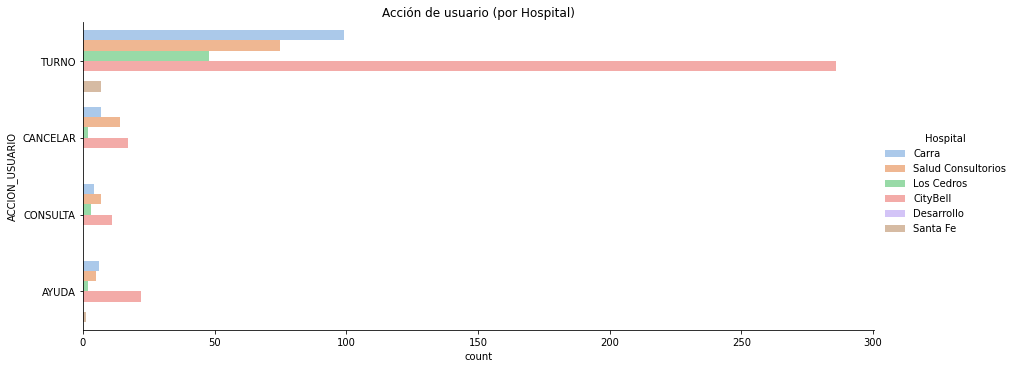

In [46]:
seaborn.catplot(y= "ACCION_USUARIO", hue="Hospital", kind="count", data=df, palette="pastel", height =5, aspect=2.5 )
plt.title('Acción de usuario (por Hospital)')

### Especialidad (turno)
La elección de la columna `especialidad` parece ser natural, dado que los datos provienen de un sistema de asignación de turnos en hospitales. En un principio, la motivación es poder analizar qué tipos de turnos se reservan mediante el _chatbot_. A futuro se podrían comparar estos datos con los registros de hospitales (los que usan la aplicación, u otros) para evaluar si estos datos son representativos en cuanto a demanda de profesionales de la salud.

In [47]:
def get_especialidad(body):
  """
  Returns None if it can't retrieve the expected value
  """
  l = body.strip().split(' ')[3:]
  try:
    idx = l.index('ha') # leemos hasta 'ha sido...'
    return ' '.join(l[:idx]).title()
  except ValueError:
    return None


In [48]:
s = """tu turno de CLINICA MEDICA ha sido confirmado para la fecha 22/02/2022 a las 18:00 hrs, en Carrá, Bv. 9 de Julio 1501, S.Francisco, con Dr./Dra. Parente Sabrina
"""
get_especialidad(s)

'Clinica Medica'

In [49]:
target = df[df.Appointment == 1].Body
target.unique()

array([' tu turno de CLINICA MEDICA ha sido confirmado para la fecha 22/02/2022 a las 18:00 hrs, en Carrá, Bv. 9 de Julio 1501, S.Francisco, con Dr./Dra. Parente Sabrina',
       ' tu turno de OTORRINOLARINGOLOGIA ha sido confirmado para la fecha 18/02/2022 a las 19:15 hrs, en Carrá, Bv. 9 de Julio 1501, S.Francisco, con Dr./Dra. Zorzi Fernando',
       ' tu turno de OBSTETRICIA ha sido confirmado para la fecha 21/03/2022 a las 16:00 hrs, en Calle 474 N583 entre 14a y 14b City Bell, con Dr./Dra. Gorriti Claudia',
       ...,
       ' tu turno de CARDIOLOGIA ha sido confirmado para la fecha 18/04/2022 a las 09:10 hrs, en Cons. Externos, Sede Tomás Villegas 2387, con Dr./Dra. MISERQUE SALOMON WADIT MUSA',
       ' tu turno de NUTRICION ha sido confirmado para la fecha 11/03/2022 a las 11:00 hrs, en Calle 474 N583 entre 14a y 14b City Bell, con Dr./Dra. BANDIERA MARIA CECILIA',
       ' tu turno de CLINICA MEDICA ha sido confirmado para la fecha 08/03/2022 a las 09:00 hrs, en Carrá, Bv. 9

In [50]:
df.loc[df.Appointment == 1, 'Especialidad'] = df[df.Appointment == 1].Body.apply(get_especialidad)
df['Especialidad'].unique()

array([nan, 'Clinica Medica', 'Otorrinolaringologia', 'Obstetricia',
       'Dermatologia', 'Pediatria', 'Cardiologia', 'Ginecologia',
       'Traumatologia', 'Flebologia', 'Alergia', 'Neumonologia',
       'Gastroenterologia', 'Nutricion', 'Urologia', 'Neurologia',
       'Endocrinologia', 'Mastologia', 'Oftalmologia',
       'Ginecologia Quirurgica', 'Cardiologia Pediatrica', 'Oncologia',
       'Reumatologia', 'Diabetologia', 'Nefrologia', 'Neurocirugia',
       'Cirugia', 'Cardiología', 'Hematologia', 'Cirugia Plastica',
       'Cirugia Cardiovascular Central', 'Psiquiatria', 'Clinico',
       'Alergia E Inmunologia', 'Nutricion Infantil', 'Categoría',
       'Alimentacion Y Nutricion', 'Infectologia', 'Endocrinología',
       'Traumatologia Y Ortopedia', 'Ginecologia Y Obstetricia',
       'Cirugia General Y Laparoscopica', None, 'Cirugia General',
       'Electroencefalograma',
       'Cirugia Cardiovascular Periferica Y Flebologia', 'Bono',
       'Eletrocardiograma', 'Doctor La

Vemos que existen algunos valores que no parecen ser especialidades (descartando `None`, que es esperable):
* 'Bono'
* 'Doctor Lares'
* 'Categoría

In [51]:
rare_values = ['Bono', 'Doctor Lares', 'Categoría']

df[df['Especialidad'].isin(rare_values)]

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,conv_id,fixed_body,time_to_appointment,ACCION_USUARIO,Especialidad
68715,CityBell,whatsapp:+5492215137770,tu turno de categoría ha sido confirmado para...,read,2022-02-10 15:37:51+00:00,2022-02-10,10,2,15,1,...,0,[],0,[],0,2151,tu turno de categoría ha sido confirmado para...,13 days,NaN,Categoría
146900,CityBell,whatsapp:+5492215137770,tu turno de Bono ha sido confirmado para la f...,read,2022-02-21 11:24:43+00:00,2022-02-21,21,2,11,1,...,0,[],0,[],0,1999,tu turno de Bono ha sido confirmado para la f...,30 days,NaN,Bono
192492,Carra,whatsapp:+5493515266217,tu turno de Doctor lares ha sido confirmado p...,read,2022-02-25 09:23:42+00:00,2022-02-25,25,2,9,1,...,0,[],0,[],0,4999,tu turno de Doctor lares ha sido confirmado p...,25 days,NaN,Doctor Lares


Vemos que las especialidades mencionadas cumplen con las reglas de _parseo_. Para el caso de _Doctor Lares_ podemos asumir que es un turno con un profesional. ¿Se puede hacer lo mismo con los restantes? ¿Es correcto asumir que `Bono` se refiere al pago de una contribución, o a una cita con un cantante irlandes? ¿Qué quiere decir _'tu turno de categoría'_?
Sin respuestas a estas preguntas, podemos pensar en impugnar estos registros (posiblemente toda la conversación)

### 5) Verificar espacios y normalizar los nombres de las features que crean convenientes para un mejor entendimiento de su significado. 


In [52]:
#Visualizo los nombres de las columnas.
df_definitiva.columns

Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'conv_id'],
      dtype='object')

In [53]:
#Reemplazo los nombres de las columnas.
df_definitiva.columns = ['Hospital', 'Telefono_Hospital', 'Mensaje', 'Estado_Mensaje', 'Fecha_Completa_Mensaje', 'Fecha',
        'Dia', 'Mes', 'Hora', 'Mensaje_dev', 'Direccion_Mensaje', 'Confirmacion_Mensaje',
       'Confirmacion_Mensaje_01', 'Cancelacion_Mensaje', 'Cancelacion_Mensaje_01', 'Consulta_Turno',
       'Consulta_Turno_01', 'Falla_Comunicacion_Humano', 'Falla_Comunicacion_Humano_01', 'Existosa_Comunicacion_Humano', 'Existosa_Comunicacion_Humano_01',
       'Cupo_Lleno_Por_Obra_Social', 'Cupo_Lleno_Por_Obra_Social_01', 'Error_Mensaje_No_Relacionado', 
        'Error_Mensaje_No_Relacionado_01','Error_Interno', 'Error_Interno_01', 'Error_Sistema', 'Error_Sistema_01',
       'Falla_Api_Externo', 'Falla_Api_Externo_01', 'DNI_Registrado_01', 'DNI_No_Registrado_01',
       'Nombre_No_Registrado', 'Nombre_No_Registrado_01', 'Informacion_Kunan', 'Informacion_Kunan_01',
       'Necesidad_Comunicacion_Humano', 'Necesidad_Comunicacion_Humano_01', 'Conversacion_Id']

In [54]:
df_definitiva.columns

Index(['Hospital', 'Telefono_Hospital', 'Mensaje', 'Estado_Mensaje',
       'Fecha_Completa_Mensaje', 'Fecha', 'Dia', 'Mes', 'Hora', 'Mensaje_dev',
       'Direccion_Mensaje', 'Confirmacion_Mensaje', 'Confirmacion_Mensaje_01',
       'Cancelacion_Mensaje', 'Cancelacion_Mensaje_01', 'Consulta_Turno',
       'Consulta_Turno_01', 'Falla_Comunicacion_Humano',
       'Falla_Comunicacion_Humano_01', 'Existosa_Comunicacion_Humano',
       'Existosa_Comunicacion_Humano_01', 'Cupo_Lleno_Por_Obra_Social',
       'Cupo_Lleno_Por_Obra_Social_01', 'Error_Mensaje_No_Relacionado',
       'Error_Mensaje_No_Relacionado_01', 'Error_Interno', 'Error_Interno_01',
       'Error_Sistema', 'Error_Sistema_01', 'Falla_Api_Externo',
       'Falla_Api_Externo_01', 'DNI_Registrado_01', 'DNI_No_Registrado_01',
       'Nombre_No_Registrado', 'Nombre_No_Registrado_01', 'Informacion_Kunan',
       'Informacion_Kunan_01', 'Necesidad_Comunicacion_Humano',
       'Necesidad_Comunicacion_Humano_01', 'Conversacion_Id'],
 

Se normalizan los nombres de las features para lograr un mejor entendimiento de su significado.

### 6) Supongamos que necesitamos compartir públicamente todo el dataset y que los features "Body" contienen potencialmente datos sensibles y confidenciales. Elijan y apliquen técnicas de análisis de texto para detectarlas y técnicas de despersonalización para solucionar este aspecto.



La Ley 25.326 (PROTECCION DE LOS DATOS PERSONALES) establece que los datos sensibles como
```
— Datos sensibles: Datos personales que revelan origen racial y étnico, opiniones políticas, convicciones religiosas, filosóficas o morales, afiliación sindical e información referente a la salud o a la vida sexual.
```

Vamos a utilizar las siguiente funciones para enmascarar datos. 

In [55]:
import hashlib

sha256_mask = lambda x: hashlib.sha256(x.encode()).hexdigest()

#Por ejemplo
sha256_mask("este es un dato privado")

'6a39b3212129bdaae5a9b919105bb64ca8248a2cca3032a758253b66ab26bc08'

In [56]:
def mask_data(data, is_sensible, mask_fn = sha256_mask):
  """
  Mask lines which hold sensible data, which can be filtered by the is_sensible function: (str) -> bool
  """
  lines = data.split('\n')

  changes = {}

  # Find sensitive data
  for lineno, line in enumerate(lines):
    haystack = line.lower()
    if is_sensible(haystack):
      line_parts = line.split(":")
      changes[lineno] = ": ".join([ line_parts[0], mask_fn(line_parts[1])])

  # Replace it
  for lineno, masked in changes.items():
    lines[lineno] = masked
  return "\n ".join(lines), len(changes) > 0

Enmascaramos los datos referidos a la obra social

In [57]:
def hide_health_plan(data, mask_fn = sha256_mask):
  """
  Given a string which (potentially) contains sensible data, hide data. Consider the multiline string:
  ¡Muchas gracias! Tus datos son:  
  XXXXXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXXXXXXXXX   Obra social: I.O.M.A. ( AF. OBLIGATORIOS ) 
    Plan: GENERAL 
▫️ Si querés confirmar escribí SI 
▫️ Si querés cancelar escribí NO 
▫️ Si querés cambiar un dato indicame cual

  """
  return mask_data(data, lambda l: 'obra social:' in l or 'plan:' in l, mask_fn)

Por ejemplo

In [58]:
msg_obra_social = """¡Muchas gracias! Tus datos son:  
XXXXXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXXXXXXXXX   Obra social: I.O.M.A. ( AF. OBLIGATORIOS ) 
Plan: GENERAL 
* Si querés confirmar escribí SI 
* Si querés cancelar escribí NO 
* Si querés cambiar un dato indicame cual
"""

line, has_changes = hide_health_plan(msg_obra_social)
for l in line.split("\n"):
  print(l)

¡Muchas gracias! Tus datos son:  
 XXXXXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXXXXXXXXX   Obra social: b3132d3200cf8a430cba2713dbc5c6c16e2c8175292ba82e670be4bd805e6d41
 Plan: 9018cbd4a192e5ba52ad29ea8b3680bfed1ef96216ab6e182b8faa7f3be5c14e
 * Si querés confirmar escribí SI 
 * Si querés cancelar escribí NO 
 * Si querés cambiar un dato indicame cual
 


Enmascaramos los datos referidos al turno 

In [59]:
def hide_appointment_info(data, mask_fn = sha256_mask):
  """
  Given a string which (potentially) contains sensible data, hide data. Consider the multiline string:
  ¡Muchas gracias! Tus datos son: 
  Sede: Calle 474 N583 entre 14a y 14b City Bell 
  Especialidad: Cardiologia 
  Doctor: Zabala Federico 
  Fecha y hora: 02/03/2022 a las 14:00 hrs 
▫️ Si querés confirmar escribí SI 
▫️ Si querés cancelar escribí NO 
▫️ Si querés cambiar un dato indicame cual
  """
  return mask_data(data, lambda l: 'sede' in l or 'especialidad:' in l or 'doctor:' in l or 'fecha:' in l, mask_fn)

In [60]:
msg_dia_y_lugar = """¡Muchas gracias! Tus datos son: 
  Sede: Calle 474 N583 entre 14a y 14b City Bell 
  Especialidad: Cardiologia 
  Doctor: Zabala Federico 
  Fecha y hora: 02/03/2022 a las 14:00 hrs 
▫️ Si querés confirmar escribí SI 
▫️ Si querés cancelar escribí NO 
▫️ Si querés cambiar un dato indicame cual"""

masked, _ = hide_appointment_info(msg_dia_y_lugar)
for line in masked.split("\n"):
  print(line)

¡Muchas gracias! Tus datos son: 
   Sede: 1dfd34bddd4538e83b0dabefa238e4f7b6940c14da6f17ea46a3fe5c1caea444
   Especialidad: dc051b3a02a77fe7ebd9992821f40e5fb5deac92f07a76f82aaa93f859c35f32
   Doctor: 31136c51c78104658ea788b0cee1e8d3f51365725f1f3ad8fc433d89961d96db
   Fecha y hora: 02/03/2022 a las 14:00 hrs 
 ▫️ Si querés confirmar escribí SI 
 ▫️ Si querés cancelar escribí NO 
 ▫️ Si querés cambiar un dato indicame cual


Finalmente, generamos una única función para poder emascarar los datos

In [61]:
def compose(*args):
    def apply(s):
      for f in args:
        masked, has_changes  = f(s)
        if has_changes:
            return masked
      return s
    return apply

In [62]:
fn = compose(hide_appointment_info, hide_health_plan)

Agregamos los datos en una nueva columna. Elegimos no reemplazar la columna existente debido a que
* Se pueden requerir los datos sin enmascarar
* Si eventualmente es necesario eliminar los datos sensibles, esto se puede hacer en una etapa posterior del _pipeline_

In [63]:
body_col = 'Mensaje'
body_seguro_col = 'Mensaje enmascarado'

In [64]:
filtro = df_definitiva[body_col].str.contains("Tus datos son")
len(df_definitiva[filtro])

21456

Usando la función `loc` podemos agregar una nueva columna en las filas que contienen datos sensibles

In [65]:
df_definitiva.loc[filtro, body_seguro_col] = df_definitiva[filtro][body_col].apply(fn)

Finalmente, mostramos algunos de los registros con datos ocultos

In [66]:
df_definitiva[df_definitiva[body_seguro_col].isnull() == False].sample(2)[body_seguro_col].values

array(['¡Muchas gracias! Tus datos son: \n   Sede: 9ef52d5b36efa465686a70291d2cff8d17c924ed1c4cd57ac6c971eab45685b4\n   Especialidad: c5ab8193ee7b0800467e696939db3c035498ce024a7fe52427a64fbfb6563942\n   Doctor: f7d1f53ca05843f7a6dee037e3188534d8410a559b42de31a64ceb59dd943d6f\n   Fecha y hora: 30/03/2022 a las 13:00 hrs \n ▫️ Si querés confirmar escribí SI \n ▫️ Si querés cancelar escribí NO \n ▫️ Si querés cambiar un dato indicame cual',
       '¡Muchas gracias! Tus datos son:  \n   XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX XXXXXXXXXXXXXXXXXXXXXXXXXXXXXX   Obra social: a280f8682fbefae860525b4dd69ea7e7a93d60802e8079124e765bb82fec5105\n     Plan: 8c86f184e43f5af870a394d92458746dbc1cc635660b0d246e1edfbcbde53ca3\n ▫️ Si querés confirmar escribí SI \n ▫️ Si querés cancelar escribí NO \n ▫️ Si querés cambiar un dato indicame cual'],
      dtype=object)

### 7) Analizar y normalizar los datos faltantes (nulos), si existen.

In [86]:
#Se muestran los valores no nulos por columna.
df_definitiva.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394090 entries, 0 to 197044
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   Hospital                          394090 non-null  object             
 1   Telefono_Hospital                 394090 non-null  object             
 2   Mensaje                           394090 non-null  object             
 3   Estado_Mensaje                    394090 non-null  object             
 4   Fecha_Completa_Mensaje            394090 non-null  datetime64[ns, UTC]
 5   Fecha                             394090 non-null  datetime64[ns]     
 6   Dia                               394090 non-null  int64              
 7   Mes                               394090 non-null  int64              
 8   Hora                              394090 non-null  int64              
 9   Mensaje_dev                       394090 non-nul

In [87]:
#Se muestran directamente los valores nulos por columna para una mejor visualización.
df_definitiva.isna().sum()

Hospital                                 0
Telefono_Hospital                        0
Mensaje                                  0
Estado_Mensaje                           0
Fecha_Completa_Mensaje                   0
Fecha                                    0
Dia                                      0
Mes                                      0
Hora                                     0
Mensaje_dev                              0
Direccion_Mensaje                        0
Confirmacion_Mensaje                     0
Confirmacion_Mensaje_01                  0
Cancelacion_Mensaje                      0
Cancelacion_Mensaje_01                   0
Consulta_Turno                           0
Consulta_Turno_01                        0
Falla_Comunicacion_Humano                0
Falla_Comunicacion_Humano_01             0
Existosa_Comunicacion_Humano             0
Existosa_Comunicacion_Humano_01          0
Cupo_Lleno_Por_Obra_Social               0
Cupo_Lleno_Por_Obra_Social_01            0
Error_Mensa

Como se puede observar se analizan las columnas de todo el dataframe y se encuentra que no existen valores nulos, por lo tanto no es necesario normalizar ningún dato.

### 8) Outliers: existen valores atípicos en las columnas del dataset? Si las hay, aplicar una solución para normalizar solo esos Outliers. 

Una forma de encontrar si existen valores atípicos en el dataset es comparar las variables categóricas con las variables codificadas de cada una de ellas.
Entonces primero se obtiene la cantidad de valores para una y para otra, y luego se compara que la cantidad de coincidencias sea igual que estas.

In [172]:
df_definitiva.Confirmacion_Mensaje.unique()

array(['[]', "[' ha sido confirmado']"], dtype=object)

Para Confirmacion_Mensaje y Confirmacion_Mensaje_01:

In [173]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Confirmacion_Mensaje[df_definitiva.Confirmacion_Mensaje  == "[' ha sido confirmado']"].count()

5997

In [174]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Confirmacion_Mensaje_01[df_definitiva.Confirmacion_Mensaje_01 == 1].count()

5997

In [176]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Confirmacion_Mensaje_01 == 1) & (df_definitiva.Confirmacion_Mensaje == "[' ha sido confirmado']")]
df_1.Confirmacion_Mensaje.count()

5997

Para Cancelacion_Mensaje y Cancelacion_Mensaje_01 :

In [169]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Cancelacion_Mensaje[df_definitiva.Cancelacion_Mensaje  == "['cancelado tu turno de']"].count()

1430

In [170]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Cancelacion_Mensaje_01[df_definitiva.Cancelacion_Mensaje_01 == 1].count()

1430

In [171]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Cancelacion_Mensaje_01 == 1) & (df_definitiva.Cancelacion_Mensaje == "['cancelado tu turno de']")]
df_1.Cancelacion_Mensaje_01.count()

1430

Para Consulta_Turno y Consulta_Turno_01 :

In [160]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Consulta_Turno[df_definitiva.Consulta_Turno  == "['estoy buscando tus turnos']"].count()

1001

In [161]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Consulta_Turno_01[df_definitiva.Consulta_Turno_01   == 1].count()

1001

In [162]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Consulta_Turno_01  == 1) & (df_definitiva.Consulta_Turno == "['estoy buscando tus turnos']")]
df_1.Consulta_Turno_01.count()

1001

Para Falla_Comunicacion_Humano y Falla_Comunicacion_Humano_01 :

In [152]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Falla_Comunicacion_Humano[df_definitiva.Falla_Comunicacion_Humano  == "['fuera del horario']"].count()

2507

In [153]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Falla_Comunicacion_Humano_01[df_definitiva.Falla_Comunicacion_Humano_01   == 1].count()

2507

In [154]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Falla_Comunicacion_Humano_01  == 1) & (df_definitiva.Falla_Comunicacion_Humano == "['fuera del horario']")]
df_1.Falla_Comunicacion_Humano_01.count()

2507

Para Existosa_Comunicacion_Humano y Existosa_Comunicacion_Humano_01 :

In [146]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Existosa_Comunicacion_Humano[df_definitiva.Existosa_Comunicacion_Humano  == "['fuiste transferido a un humano']"].count()

2757

In [147]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Existosa_Comunicacion_Humano_01[df_definitiva.Existosa_Comunicacion_Humano_01   == 1].count()

2757

In [148]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Existosa_Comunicacion_Humano_01  == 1) & (df_definitiva.Existosa_Comunicacion_Humano == "['fuiste transferido a un humano']")]
df_1.Existosa_Comunicacion_Humano_01.count()

2757


Para Cupo_Lleno_Por_Obra_Social y Cupo_Lleno_Por_Obra_Social_01 :

In [139]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Cupo_Lleno_Por_Obra_Social[df_definitiva.Cupo_Lleno_Por_Obra_Social  == "['cupo de consultas diarias con la obra social seleccionada']"].count()

1893

In [140]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Cupo_Lleno_Por_Obra_Social_01 [df_definitiva.Cupo_Lleno_Por_Obra_Social_01   == 1].count()

1893

In [142]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Cupo_Lleno_Por_Obra_Social_01  == 1) & (df_definitiva.Cupo_Lleno_Por_Obra_Social == "['cupo de consultas diarias con la obra social seleccionada']")]
df_1.Cupo_Lleno_Por_Obra_Social_01 .count()

1893

Para Error_Mensaje_No_Relacionado y Error_Mensaje_No_Relacionado_01:

In [135]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Mensaje_No_Relacionado[df_definitiva.Error_Mensaje_No_Relacionado == "['solamente ayudo con temas relacionados con nuestro centro de salud']"].count()

712

In [136]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Mensaje_No_Relacionado_01[df_definitiva.Error_Mensaje_No_Relacionado_01  == 1].count()

712

In [137]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Mensaje_No_Relacionado_01 == 1) & (df_definitiva.Error_Mensaje_No_Relacionado == "['solamente ayudo con temas relacionados con nuestro centro de salud']")]
df_1.Error_Mensaje_No_Relacionado.count()

712


Para Error_Interno y Error_Interno_01:

In [130]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Interno[df_definitiva.Error_Interno == "['error interno. cerrá y volvé a abrir la aplicación']"].count()

519

In [131]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Sistema_01[df_definitiva.Error_Interno_01  == 1].count()

519

In [133]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Interno_01 == 1) & (df_definitiva.Error_Interno == "['error interno. cerrá y volvé a abrir la aplicación']")]
df_1.Error_Interno.count()

519

Para Error_Sistema y Error_Sistema_01:

In [125]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Sistema[df_definitiva.Error_Sistema == "['el sistema de gestión de turnos no está disponible']"].count()

544

In [126]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Sistema_01[df_definitiva.Error_Sistema_01  == 1].count()

544

In [128]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Sistema_01 == 1) & (df_definitiva.Error_Sistema == "['el sistema de gestión de turnos no está disponible']")]
df_1.Error_Sistema_01.count()

544

Para Falla_Api_Externo y Falla_Api_Externo_01:

In [119]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Falla_Api_Externo[df_definitiva.Falla_Api_Externo == "['hubo un error, intentá más tarde']"].count()

821

In [120]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva. Falla_Api_Externo_01 [df_definitiva. Falla_Api_Externo_01  == 1].count()

821

In [121]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Falla_Api_Externo_01 == 1) & (df_definitiva.Falla_Api_Externo == "['hubo un error, intentá más tarde']")]
df_1.Falla_Api_Externo_01.count()

821

Para DNI_Registrado_01 y DNI_No_Registrado_01:

In [112]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.DNI_Registrado_01[df_definitiva.DNI_Registrado_01 == "['no se encuentra registrado ese dni en el sistema']"].count()

3868

In [113]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva. DNI_No_Registrado_01 [df_definitiva. DNI_No_Registrado_01  == 1].count()

3868

In [114]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.DNI_No_Registrado_01 == 1) & (df_definitiva.DNI_Registrado_01 == "['no se encuentra registrado ese dni en el sistema']")]
df_1.DNI_No_Registrado_01.count()

3868

Para Nombre_No_Registrado y Nombre_No_Registrado_01:

In [98]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Nombre_No_Registrado[df_definitiva.Nombre_No_Registrado == "['para poder agendar tu turno necesito tu nombre y apellido']"].count()

719

In [99]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Nombre_No_Registrado_01 [df_definitiva.Nombre_No_Registrado_01  == 1].count()

719

In [100]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Nombre_No_Registrado_01 == 1) & (df_definitiva.Nombre_No_Registrado == "['para poder agendar tu turno necesito tu nombre y apellido']")]
df_1.Informacion_Kunan.count()

719

Para Informacion_Kunan y Informacion_Kunan_01:

In [101]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Informacion_Kunan[df_definitiva.Informacion_Kunan == "['kunan es la empresa de tecnología responsable por el desarrollo de este asistente virtual']"].count()

9

In [102]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Informacion_Kunan_01[df_definitiva.Informacion_Kunan_01 == 1].count()

9

In [103]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Informacion_Kunan_01 == 1) & (df_definitiva.Informacion_Kunan == "['kunan es la empresa de tecnología responsable por el desarrollo de este asistente virtual']")]
df_1.Informacion_Kunan.count()

9

Para Necesidad_Comunicacion_Humano y Necesidad_Comunicacion_Humano_01:

In [104]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Necesidad_Comunicacion_Humano[df_definitiva.Necesidad_Comunicacion_Humano == "['disculpe, el asistente virtual de']"].count()

1474

In [105]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Necesidad_Comunicacion_Humano_01[df_definitiva.Necesidad_Comunicacion_Humano_01 == 1].count()

1474

In [106]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Necesidad_Comunicacion_Humano_01 == 1) & (df_definitiva.Necesidad_Comunicacion_Humano == "['disculpe, el asistente virtual de']")]
df_1.Necesidad_Comunicacion_Humano_01.count()

1474

Otra manera de verificar si existen valores átipicos para las varaibles:

Hospital             
Telefono_Hospital

Es verificando la cantidad de valores distintos para cada una de ellas y luego agruparlos por una de las variables para comprobar que no vean más en ninguno de los casos.

In [194]:
#Cantidad de valores distintos en teléfonos de hospital
df_definitiva.Telefono_Hospital.nunique()

7

In [195]:
#Cantidad de valores distintos en hospital
df_definitiva.Hospital.nunique()

7

In [196]:
#Se agrupan los datos
df_definitiva.Telefono_Hospital.groupby(df_definitiva.Hospital).value_counts()

Hospital            Telefono_Hospital      
Carra               whatsapp:+5493515266217    127049
CityBell            whatsapp:+5492215137770    235345
Demo                whatsapp:+12254145964         134
Desarrollo          whatsapp:+14159429752          24
Los Cedros          whatsapp:+5491120401203     69037
Salud Consultorios  whatsapp:+5493515266230     55130
Santa Fe            whatsapp:+5493424134455      1979
Name: Telefono_Hospital, dtype: int64

Se encuentran que se tienen sólo 7 agrupaciones que es la cantidad que se obtuvo al principio, por lo tanto, no hay valores atípicos para estas dos variables.

Como conclusión, se llega a que no se encuentran valores atípicos tomando como análisis la correlación de los pares de variables que se vieron en este punto

In [172]:
df_definitiva.Confirmacion_Mensaje.unique()

array(['[]', "[' ha sido confirmado']"], dtype=object)

Para Confirmacion_Mensaje y Confirmacion_Mensaje_01:

In [173]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Confirmacion_Mensaje[df_definitiva.Confirmacion_Mensaje  == "[' ha sido confirmado']"].count()

5997

In [174]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Confirmacion_Mensaje_01[df_definitiva.Confirmacion_Mensaje_01 == 1].count()

5997

In [176]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Confirmacion_Mensaje_01 == 1) & (df_definitiva.Confirmacion_Mensaje == "[' ha sido confirmado']")]
df_1.Confirmacion_Mensaje.count()

5997

Para Cancelacion_Mensaje y Cancelacion_Mensaje_01 :

In [169]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Cancelacion_Mensaje[df_definitiva.Cancelacion_Mensaje  == "['cancelado tu turno de']"].count()

1430

In [170]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Cancelacion_Mensaje_01[df_definitiva.Cancelacion_Mensaje_01 == 1].count()

1430

In [171]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Cancelacion_Mensaje_01 == 1) & (df_definitiva.Cancelacion_Mensaje == "['cancelado tu turno de']")]
df_1.Cancelacion_Mensaje_01.count()

1430

Para Consulta_Turno y Consulta_Turno_01 :

In [160]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Consulta_Turno[df_definitiva.Consulta_Turno  == "['estoy buscando tus turnos']"].count()

1001

In [161]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Consulta_Turno_01[df_definitiva.Consulta_Turno_01   == 1].count()

1001

In [162]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Consulta_Turno_01  == 1) & (df_definitiva.Consulta_Turno == "['estoy buscando tus turnos']")]
df_1.Consulta_Turno_01.count()

1001

Para Falla_Comunicacion_Humano y Falla_Comunicacion_Humano_01 :

In [152]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Falla_Comunicacion_Humano[df_definitiva.Falla_Comunicacion_Humano  == "['fuera del horario']"].count()

2507

In [153]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Falla_Comunicacion_Humano_01[df_definitiva.Falla_Comunicacion_Humano_01   == 1].count()

2507

In [154]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Falla_Comunicacion_Humano_01  == 1) & (df_definitiva.Falla_Comunicacion_Humano == "['fuera del horario']")]
df_1.Falla_Comunicacion_Humano_01.count()

2507

Para Existosa_Comunicacion_Humano y Existosa_Comunicacion_Humano_01 :

In [146]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Existosa_Comunicacion_Humano[df_definitiva.Existosa_Comunicacion_Humano  == "['fuiste transferido a un humano']"].count()

2757

In [147]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Existosa_Comunicacion_Humano_01[df_definitiva.Existosa_Comunicacion_Humano_01   == 1].count()

2757

In [148]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Existosa_Comunicacion_Humano_01  == 1) & (df_definitiva.Existosa_Comunicacion_Humano == "['fuiste transferido a un humano']")]
df_1.Existosa_Comunicacion_Humano_01.count()

2757


Para Cupo_Lleno_Por_Obra_Social y Cupo_Lleno_Por_Obra_Social_01 :

In [139]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Cupo_Lleno_Por_Obra_Social[df_definitiva.Cupo_Lleno_Por_Obra_Social  == "['cupo de consultas diarias con la obra social seleccionada']"].count()

1893

In [140]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Cupo_Lleno_Por_Obra_Social_01 [df_definitiva.Cupo_Lleno_Por_Obra_Social_01   == 1].count()

1893

In [142]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Cupo_Lleno_Por_Obra_Social_01  == 1) & (df_definitiva.Cupo_Lleno_Por_Obra_Social == "['cupo de consultas diarias con la obra social seleccionada']")]
df_1.Cupo_Lleno_Por_Obra_Social_01 .count()

1893

Para Error_Mensaje_No_Relacionado y Error_Mensaje_No_Relacionado_01:

In [135]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Mensaje_No_Relacionado[df_definitiva.Error_Mensaje_No_Relacionado == "['solamente ayudo con temas relacionados con nuestro centro de salud']"].count()

712

In [136]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Mensaje_No_Relacionado_01[df_definitiva.Error_Mensaje_No_Relacionado_01  == 1].count()

712

In [137]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Mensaje_No_Relacionado_01 == 1) & (df_definitiva.Error_Mensaje_No_Relacionado == "['solamente ayudo con temas relacionados con nuestro centro de salud']")]
df_1.Error_Mensaje_No_Relacionado.count()

712


Para Error_Interno y Error_Interno_01:

In [130]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Interno[df_definitiva.Error_Interno == "['error interno. cerrá y volvé a abrir la aplicación']"].count()

519

In [131]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Sistema_01[df_definitiva.Error_Interno_01  == 1].count()

519

In [133]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Interno_01 == 1) & (df_definitiva.Error_Interno == "['error interno. cerrá y volvé a abrir la aplicación']")]
df_1.Error_Interno.count()

519

Para Error_Sistema y Error_Sistema_01:

In [125]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Error_Sistema[df_definitiva.Error_Sistema == "['el sistema de gestión de turnos no está disponible']"].count()

544

In [126]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Error_Sistema_01[df_definitiva.Error_Sistema_01  == 1].count()

544

In [128]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Error_Sistema_01 == 1) & (df_definitiva.Error_Sistema == "['el sistema de gestión de turnos no está disponible']")]
df_1.Error_Sistema_01.count()

544

Para Falla_Api_Externo y Falla_Api_Externo_01:

In [119]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Falla_Api_Externo[df_definitiva.Falla_Api_Externo == "['hubo un error, intentá más tarde']"].count()

821

In [120]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva. Falla_Api_Externo_01 [df_definitiva. Falla_Api_Externo_01  == 1].count()

821

In [121]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Falla_Api_Externo_01 == 1) & (df_definitiva.Falla_Api_Externo == "['hubo un error, intentá más tarde']")]
df_1.Falla_Api_Externo_01.count()

821

Para DNI_Registrado_01 y DNI_No_Registrado_01:

In [112]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.DNI_Registrado_01[df_definitiva.DNI_Registrado_01 == "['no se encuentra registrado ese dni en el sistema']"].count()

3868

In [113]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva. DNI_No_Registrado_01 [df_definitiva. DNI_No_Registrado_01  == 1].count()

3868

In [114]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.DNI_No_Registrado_01 == 1) & (df_definitiva.DNI_Registrado_01 == "['no se encuentra registrado ese dni en el sistema']")]
df_1.DNI_No_Registrado_01.count()

3868

Para Nombre_No_Registrado y Nombre_No_Registrado_01:

In [98]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Nombre_No_Registrado[df_definitiva.Nombre_No_Registrado == "['para poder agendar tu turno necesito tu nombre y apellido']"].count()

719

In [99]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Nombre_No_Registrado_01 [df_definitiva.Nombre_No_Registrado_01  == 1].count()

719

In [100]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Nombre_No_Registrado_01 == 1) & (df_definitiva.Nombre_No_Registrado == "['para poder agendar tu turno necesito tu nombre y apellido']")]
df_1.Informacion_Kunan.count()

719

Para Informacion_Kunan y Informacion_Kunan_01:

In [101]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Informacion_Kunan[df_definitiva.Informacion_Kunan == "['kunan es la empresa de tecnología responsable por el desarrollo de este asistente virtual']"].count()

9

In [102]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Informacion_Kunan_01[df_definitiva.Informacion_Kunan_01 == 1].count()

9

In [103]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Informacion_Kunan_01 == 1) & (df_definitiva.Informacion_Kunan == "['kunan es la empresa de tecnología responsable por el desarrollo de este asistente virtual']")]
df_1.Informacion_Kunan.count()

9

Para Necesidad_Comunicacion_Humano y Necesidad_Comunicacion_Humano_01:

In [104]:
#Cantidad de variables con mensaje, las demás son vacías:
df_definitiva.Necesidad_Comunicacion_Humano[df_definitiva.Necesidad_Comunicacion_Humano == "['disculpe, el asistente virtual de']"].count()

1474

In [105]:
#Cantidad de variables con 1, las demás son vacías:
df_definitiva.Necesidad_Comunicacion_Humano_01[df_definitiva.Necesidad_Comunicacion_Humano_01 == 1].count()

1474

In [106]:
#Cantidad de variables con mensajes y con 1.
df_1 = df_definitiva[(df_definitiva.Necesidad_Comunicacion_Humano_01 == 1) & (df_definitiva.Necesidad_Comunicacion_Humano == "['disculpe, el asistente virtual de']")]
df_1.Necesidad_Comunicacion_Humano_01.count()

1474

Otra manera de verificar si existen valores átipicos para las varaibles:

Hospital             
Telefono_Hospital

Es verificando la cantidad de valores distintos para cada una de ellas y luego agruparlos por una de las variables para comprobar que no vean más en ninguno de los casos.

In [194]:
#Cantidad de valores distintos en teléfonos de hospital
df_definitiva.Telefono_Hospital.nunique()

7

In [195]:
#Cantidad de valores distintos en hospital
df_definitiva.Hospital.nunique()

7

In [196]:
#Se agrupan los datos
df_definitiva.Telefono_Hospital.groupby(df_definitiva.Hospital).value_counts()

Hospital            Telefono_Hospital      
Carra               whatsapp:+5493515266217    127049
CityBell            whatsapp:+5492215137770    235345
Demo                whatsapp:+12254145964         134
Desarrollo          whatsapp:+14159429752          24
Los Cedros          whatsapp:+5491120401203     69037
Salud Consultorios  whatsapp:+5493515266230     55130
Santa Fe            whatsapp:+5493424134455      1979
Name: Telefono_Hospital, dtype: int64

Se encuentran que se tienen sólo 7 agrupaciones que es la cantidad que se obtuvo al principio, por lo tanto, no hay valores atípicos para estas dos variables.

Como conclusión, se llega a que no se encuentran valores atípicos tomando como análisis la correlación de los pares de variables que se vieron en este punto

### 9) Guardar el dataset resultante con un nuevo nombre, para trabajarlo más adelante.

In [ ]:
#Se convierte el dataframe en un csv:
df_definitiva.to_csv('df_AyC.csv', index = False)

Se tranforma el dataset resultante en un archivo csv para su posterior uso en los entregables siguientes.